In [47]:

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [48]:
plt.style.use('bmh')


#open df(datafile) - this was downloaded from yahoo's - there is an option to get the most recent ones, but we'll get back to it later because for testing, it is best to use constant data
df = pd.read_csv('AMZN.csv') #preferrably the historial history of a year in the selected company's stock
print(df.head(6)) #print first 6 lines

         Date         Open         High          Low        Close  \
0  2020-11-19  3105.310059  3125.000000  3080.919922  3117.020020   
1  2020-11-20  3117.020020  3132.889893  3098.050049  3099.399902   
2  2020-11-23  3116.699951  3139.750000  3065.459961  3098.389893   
3  2020-11-24  3100.500000  3134.250000  3086.260010  3118.060059   
4  2020-11-25  3141.870117  3198.000000  3140.260010  3185.070068   
5  2020-11-27  3211.260010  3216.189941  3190.050049  3195.340088   

     Adj Close   Volume  
0  3117.020020  3010300  
1  3099.399902  3374400  
2  3098.389893  4708900  
3  3118.060059  3602100  
4  3185.070068  3790400  
5  3195.340088  2392900  


In [49]:
print(df.shape) #prints dimension of multi dimesnion array (row, col)


(253, 7)


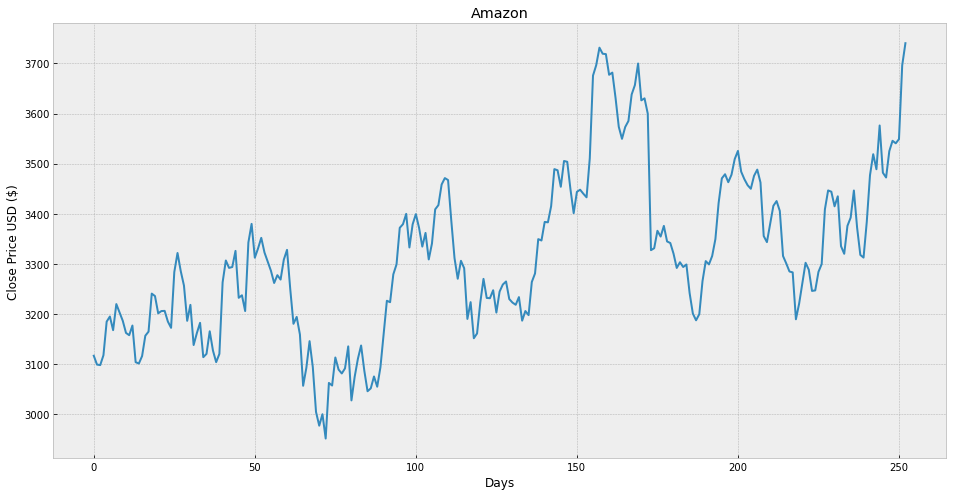

In [50]:
# #visualize closing price
plt.figure(figsize=(16,8))
plt.title('Amazon')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close']) #this is the Close column on the csv
plt.show()

In [51]:
#get the close price
df = df[['Close']]
print(df.head(4))

         Close
0  3117.020020
1  3099.399902
2  3098.389893
3  3118.060059


In [52]:
#create vairable to predict x days in the future
future_days = 25

#create new column (target) shifted x unit/days up
df['Prediction'] = df[['Close']].shift(-future_days)
print(df.head(30))

          Close   Prediction
0   3117.020020  3283.959961
1   3099.399902  3322.000000
2   3098.389893  3285.850098
3   3118.060059  3256.929932
4   3185.070068  3186.629883
5   3195.340088  3218.510010
6   3168.040039  3138.379883
7   3220.080078  3162.159912
8   3203.530029  3182.699951
9   3186.729980  3114.209961
10  3162.580078  3120.830078
11  3158.000000  3165.889893
12  3177.290039  3127.469971
13  3104.199951  3104.250000
14  3101.489990  3120.760010
15  3116.419922  3263.379883
16  3156.969971  3306.989990
17  3165.120117  3292.229980
18  3240.959961  3294.000000
19  3236.080078  3326.129883
20  3201.649902  3232.580078
21  3206.179932  3237.620117
22  3206.520020  3206.199951
23  3185.270020  3342.879883
24  3172.689941  3380.000000
25  3283.959961  3312.530029
26  3322.000000  3331.000000
27  3285.850098  3352.149902
28  3256.929932  3322.939941
29  3186.629883  3305.000000


In [53]:
#Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], axis=1))[:-future_days]
print(X)

[[3117.02002 ]
 [3099.399902]
 [3098.389893]
 [3118.060059]
 [3185.070068]
 [3195.340088]
 [3168.040039]
 [3220.080078]
 [3203.530029]
 [3186.72998 ]
 [3162.580078]
 [3158.      ]
 [3177.290039]
 [3104.199951]
 [3101.48999 ]
 [3116.419922]
 [3156.969971]
 [3165.120117]
 [3240.959961]
 [3236.080078]
 [3201.649902]
 [3206.179932]
 [3206.52002 ]
 [3185.27002 ]
 [3172.689941]
 [3283.959961]
 [3322.      ]
 [3285.850098]
 [3256.929932]
 [3186.629883]
 [3218.51001 ]
 [3138.379883]
 [3162.159912]
 [3182.699951]
 [3114.209961]
 [3120.830078]
 [3165.889893]
 [3127.469971]
 [3104.25    ]
 [3120.76001 ]
 [3263.379883]
 [3306.98999 ]
 [3292.22998 ]
 [3294.      ]
 [3326.129883]
 [3232.580078]
 [3237.620117]
 [3206.199951]
 [3342.879883]
 [3380.      ]
 [3312.530029]
 [3331.      ]
 [3352.149902]
 [3322.939941]
 [3305.      ]
 [3286.580078]
 [3262.129883]
 [3277.709961]
 [3268.949951]
 [3308.639893]
 [3328.22998 ]
 [3249.899902]
 [3180.73999 ]
 [3194.5     ]
 [3159.530029]
 [3057.159912]
 [3092.929

In [54]:
#create tha target data set (y) and conert it to a numpy array and get all of the target values except values of the x row
y = np.array(df['Prediction'])[:-future_days] #want all the data expect from the future days
print(y)


[3283.959961 3322.       3285.850098 3256.929932 3186.629883 3218.51001
 3138.379883 3162.159912 3182.699951 3114.209961 3120.830078 3165.889893
 3127.469971 3104.25     3120.76001  3263.379883 3306.98999  3292.22998
 3294.       3326.129883 3232.580078 3237.620117 3206.199951 3342.879883
 3380.       3312.530029 3331.       3352.149902 3322.939941 3305.
 3286.580078 3262.129883 3277.709961 3268.949951 3308.639893 3328.22998
 3249.899902 3180.73999  3194.5      3159.530029 3057.159912 3092.929932
 3146.139893 3094.530029 3005.       2977.570068 3000.459961 2951.949951
 3062.850098 3057.639893 3113.590088 3089.48999  3081.679932 3091.860107
 3135.72998  3027.98999  3074.959961 3110.870117 3137.5      3087.070068
 3046.26001  3052.030029 3075.72998  3055.290039 3094.080078 3161.
 3226.72998  3223.820068 3279.389893 3299.300049 3372.199951 3379.389893
 3400.       3333.       3379.090088 3399.439941 3372.01001  3334.689941
 3362.02002  3309.040039 3340.879883 3409.       3417.429932 3458.

In [55]:
#split data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

#create the models
#create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train) 
#Create the linear regresion model
lr = LinearRegression().fit(x_train, y_train)

#Get the last x rows of the feature data set
x_future = df.drop(['Prediction'], axis =1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
print(x_future)

[[3457.169922]
 [3450.      ]
 [3475.790039]
 [3488.23999 ]
 [3462.52002 ]
 [3355.72998 ]
 [3343.629883]
 [3380.050049]
 [3416.      ]
 [3425.52002 ]
 [3405.800049]
 [3315.959961]
 [3301.120117]
 [3285.040039]
 [3283.26001 ]
 [3189.780029]
 [3221.      ]
 [3262.01001 ]
 [3302.429932]
 [3288.620117]
 [3246.300049]
 [3247.330078]
 [3284.280029]
 [3299.860107]
 [3409.02002 ]]


In [56]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

#top is prediction for the tree regressor
#bottom is prediction for the linear regression prediction


[3446.73999  3444.149902 3415.060059 3435.01001  3187.01001  3320.370117
 3376.070068 3392.48999  3446.570068 3372.429932 3318.110107 3283.26001
 3384.       3477.       3518.98999  3383.129883 3576.22998  3074.959961
 3472.5      3525.149902 3545.679932 3540.699951 3549.       3161.469971
 3740.344971]

[3349.12347537 3348.5129433  3350.70901264 3351.7691489  3349.57904607
 3340.4856774  3339.45533185 3342.55657609 3345.61778065 3346.4284279
 3344.74923603 3337.09918701 3335.83554695 3334.46629868 3334.31472593
 3326.35473331 3329.01317136 3332.50524928 3335.94708011 3334.77114892
 3331.16751715 3331.25522602 3334.40158243 3335.72825478 3345.02342249]


<ipython-input-63-1d75f47eab78>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


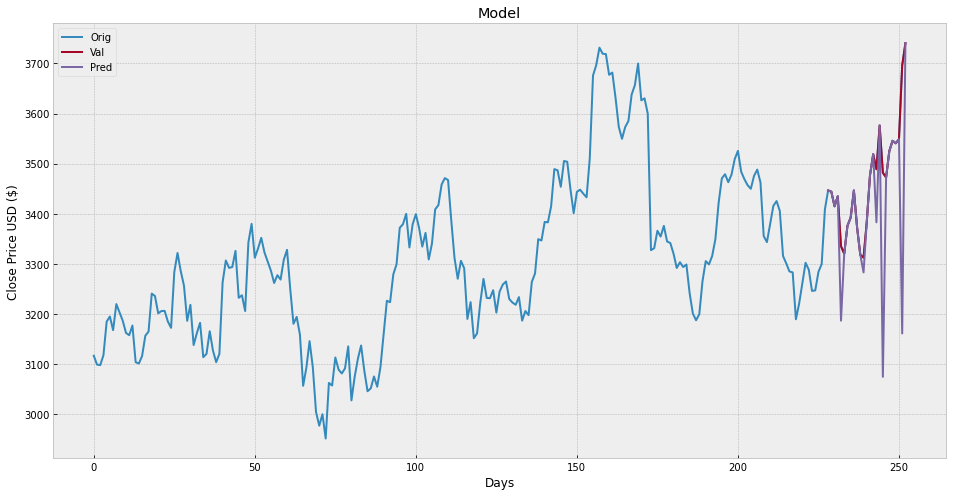

In [63]:
#Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')

plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()